# Assignment 1: Decision Tree Grid Search
## DTSC 680: Applied Machine Learning

## Name: Nash Lawrence

## Directions

The main purpose of this assignment is for you to gain experience creating and visualizing a Decision Tree along with sweeping a problem's parameter space - in this case by performing a grid search.  Doing so allows you to identify the optimal hyperparameter values to be used for training your model.

## Preliminaries

Let's import some common packages:

In [30]:
import numpy as np
from sklearn import datasets

## Load and Split Iris Data Set

Complete the following:

1. Load the `Iris` data set by calling the [load_iris()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) function of the `datasets` library from `sklearn` - name the dictionary that is returned `iris`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 40% and a `random_state` of `0`.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively. (Be sure to import the `train_test_split()` function first.)

NOTE: you will need to use the ENTIRE dataset for this assignment, not just the first two columns.

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test = train_test_split(X, test_size = 0.4, random_state = 0)
y_train, y_test = train_test_split(y, test_size = 0.4, random_state = 0)

## Create a Single Decision Tree

Complete the following:

(Cell 1:)
1. Import the `DecisionTreeClassifier` class from the `sklearn.tree` library
2. Create a DecisionTreeClassifier object called `tree_clf` with a `random_state` of `42`
3. Fit the DecisionTreeClassifier object on the training data.

(Cell 2:)

4. Make a prediction on the test data, and name the predicted values output by the model `preds`.
5. Compute the performance of the model by measuring the accuracy score on the test set.  You must import the [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function from the `sklearn.metrics` library.  Name the accuracy score value you compute `acc_score`. 
6. Print the accuracy score to the screen.


In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
from sklearn.metrics import accuracy_score
preds = tree_clf.predict(X_test)
acc_score = accuracy_score(y_test, preds)

print('Accuracy=%s' % (acc_score))

Accuracy=0.95


## Perform Grid Search

Complete the following:

(Cell 1:)
1. Import the `GridSearchCV` class from the `sklearn.model_selection` library.
2. Create a dictionary called `param_grid` with three key-value pairs.  The keys are `max_depth`, `max_leaf_nodes` and `min_samples_split`, and their respective values are `[2,3,4,5,8,16,32]`, `list(range(2, 20, 1))` and `[2,3,4,5,8,12,16,20]`.
3. Instantiate an object of the `GridSearchCV` class called `grid_search_cv`.  Pass the following as input to the constructor: 
    - The model to be used. Use a `DecisionTreeClassifier` with a `random_state` parameter of `42`.
    - The paramter grid. 
    - The hyperparameter `verbose=1`. (Look this up.)
    - The number of cross-folds. Specify `cv=3`.
    
    
4. Call the `fit()` method to perform the grid search using 3-fold cross-validation.
5. Print the best parameters identified by the grid search using the `best_params_` attribute of the GridSearchCV object.

(Cell 2:)

6. Compute the predicted values `y_pred` using the test set `X_test`.
7. Calculate the accuracy, precision, and recall scores using the `accuracy_score()`, `precision_score()`, and `recall_score()` functions.  Call these `acc_score`, `prec_score`, and `recall_score`, respectively. Set the average parameter to `micro` when calculating precision and recall to account for multiple classes.
8. Print all three scores to the screen.

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2, 3, 4, 5, 8, 16, 32], 'max_leaf_nodes': list(range(2, 20, 1)),
              'min_samples_split': [2, 3, 4, 5, 8, 12, 16, 20]}
grid_search_cv = GridSearchCV(tree_clf, param_grid, verbose = 1, cv = 3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits
The best parameters are:  {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 2}


In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = grid_search_cv.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred, average = 'micro')
recall_score = recall_score(y_test, y_pred, average = 'micro')

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (prec_score))
print('Recall=%s' % (recall_score))

Accuracy=0.8666666666666667
Precision=0.8666666666666667
Recall=0.8666666666666667


## Visualize Optimal Decision Tree as Text

Instantiate a new `DecisionTreeClassifier` object, and use the `best_params_` attribute of the `grid_search_cv` object to specify the best `max_depth`, `max_leaf_nodes` and `min_samples_split` values calculated from the grid search along with a `random_state` of `42`.  Retrain the "optimal" (for the few parameters that we swept) decision tree.

Next, use the [tree.export_text()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) method to visualize the "optimal" decision tree.  This function takes a trained classifier as its first parameter, and a set of feature names as its second parameter (the feature names are included in the `iris` dictionary returned from the `load_iris()` function).  The result is a text based visualization of the decision tree.  Note that this method returns a string, so you'll want to `print()` the result to get it to look right.

In [36]:
from sklearn.tree import export_text

treeClass = DecisionTreeClassifier(random_state = 42)
treeClass.fit(X_train, y_train)
gridSearch = GridSearchCV(treeClass, param_grid, verbose = 1, cv = 3)
gridSearch.fit(X_train, y_train)
print(gridSearch.best_params_)

print(export_text(treeClass, feature_names=iris['feature_names']))

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits
{'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 2}
|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal length (cm) <= 5.05
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |--- petal length (cm) >  5.05
|   |   |--- class: 2



## Visualize Optimal Decision Tree as Image

Use the `tree.plot_tree()` method to visualize the "optimal" decision tree, which takes a trained classifier as its only parameter and returns a graphical visualization of the decision tree. Use `filled=True` as an argument to the method to add color to the image.

[Text(0.4, 0.9, 'x[2] <= 2.35\ngini = 0.663\nsamples = 90\nvalue = [34, 27, 29]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.7, 'x[2] <= 5.05\ngini = 0.499\nsamples = 56\nvalue = [0, 27, 29]'),
 Text(0.4, 0.5, 'x[3] <= 1.75\ngini = 0.128\nsamples = 29\nvalue = [0, 27, 2]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.6, 0.3, 'x[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]

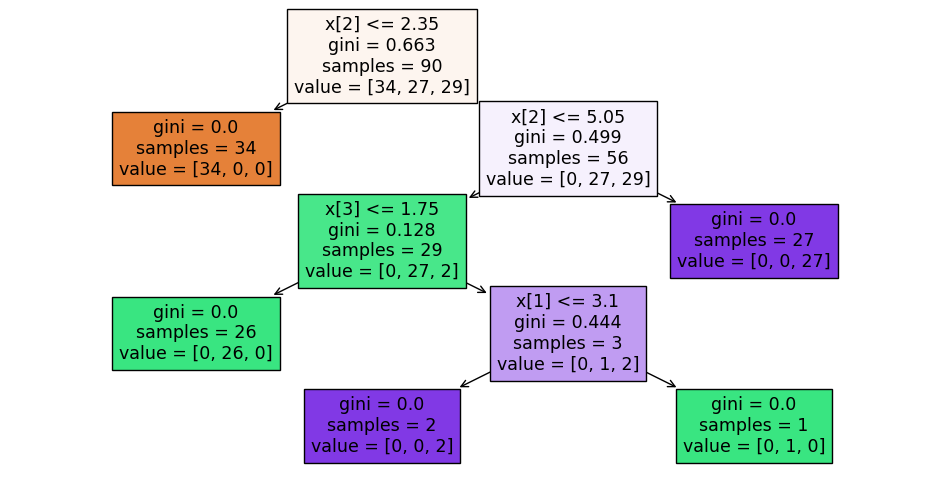

In [37]:
from sklearn import tree
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
tree.plot_tree(treeClass, filled = True)

## Critical Analysis

1. In your own words (a sentence or two) explain what setting the GridSearchCV hyperparameter `verbose` to `1` does. Please provide a citation. (A link to the website or the name of the book where you found this answer will suffice.)

2. In your own words, describe or interpret the role of the gini score criterion in the decision tree algorithm. How does this compare to the entropy impurity measure? Finally, sklearn uses the CART (Classification and Regression Tree) algorithm to train Decision Trees. How does this algorithm determine the feature and threshold value to use for splitting at each step of the Decision Tree algorithm? It may be helpful to look at outside resources to help you answer these questions (The YouTube channel ["StatQuest"](https://youtu.be/7VeUPuFGJHk) has some excellent videos on Decision Trees for those of you that like visual explanations.) 

Make sure that you answer all the questions above. I am looking for **meaningful content** here that **goes into detail**. Don't just copy from the textbook or rush through answering this question.

Q1: Verbose measures the verbosity, which gives detailed information about what the computer is doing. The higher verbose, the more messages. Setting the hyperparameter to 1 in the GridSearchCV function, we are seeing the simple output and statistics needed to analyze our model rather than getting specific information on every value in a training/test set.

Link1: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Link2: https://www.delftstack.com/howto/python/python-verbose/


Q2: In the decision tree algorithm, the gini score criterion determines its impurity. A score of 0 represents a pure node, meaning all applied training instances belong to the same class. For example, if there are 75 samples and the values go as followed: (0, 75, 0) then it will have a gini score of 0 because all 75 values are in Class 1. Entropy on the other hand is measured as the purity of the sub-split. The algorithm calculates the entropy of each feature after each split, then chooses the best feature to go off of. The CART algorithm determines the feature and threshold values for splitting at each step in the Decision Tree algorithm by splitting the training set into two subsets using single features k and a threshold tk. It then searches for the best pair that produces the purest subsets.

## Ungraded Critical Thinking Question

Compare the accuracy score from the first Decision Tree to the accuracy score after you performed the grid search. How does it differ? It is most likely that you will find the accuracy score has decreased. Is that what you had expected? We perform a round of grid searching in order to elucidate the optimal hyperparameter values. Why, then, has the accuracy score decreased? Most importantly, what caused this decrease in the accuracy score and why? Explain your answer.

(Write analysis here.)

The accuracy score for the Decision Tree is higher than the Grid Search, sitting at 0.95 compared to 0.866.
I did not expect the accuracy score to decrease because I was thinking more about the Grid Search's use of hyperparameters
rather than the potential overfitting of data in the Decision Tree. I think the accuracy score decreased because the Decision
Tree has insufficient data due to the model overfitting. This is a result of the data being too large and complex for the 
Decision Tree, causing overfitting and unreliable results. This is avoided in the Grid Search because its process involves
exploring a range of hyperparameters that best fit the model and its performance on the validation dataset.